In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd

import sys
sys.path.append('../data')

import congress_db
from setup_db import Candidate, Contribution, Committee
session = congress_db.create_session()

/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from sqlalchemy import func

total_contributions = session.query(Candidate.name, func.sum(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_total, amounts_total = zip(*total_contributions)

/home/isaac/anaconda/lib/python2.7/site-packages/sqlalchemy/sql/compiler.py:575: SAWarning: Can't resolve label reference 'total desc'; converting to text() (this warning may be suppressed after 10 occurrences)
  util.ellipses_string(element.element))


/home/isaac/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


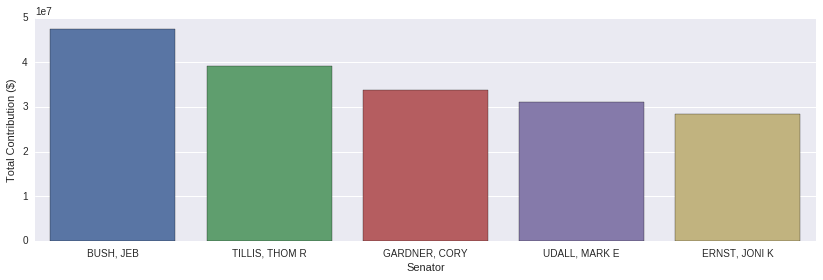

In [4]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_total[:5], amounts_total[:5])
plt.xlabel('Senator')
plt.ylabel('Total Contribution ($)')
plt.show()

In [5]:
mean_contributions = session.query(Candidate.name, func.avg(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_mean, amounts_mean = zip(*mean_contributions)

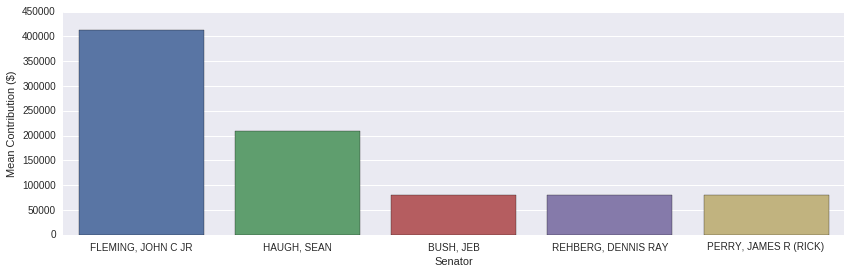

In [6]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_mean[:5], amounts_mean[:5])
plt.xlabel('Senator')
plt.ylabel('Mean Contribution ($)')
plt.show()

In [7]:
num_contributions = session.query(Candidate.name, func.count(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_num, amounts_num = zip(*num_contributions)

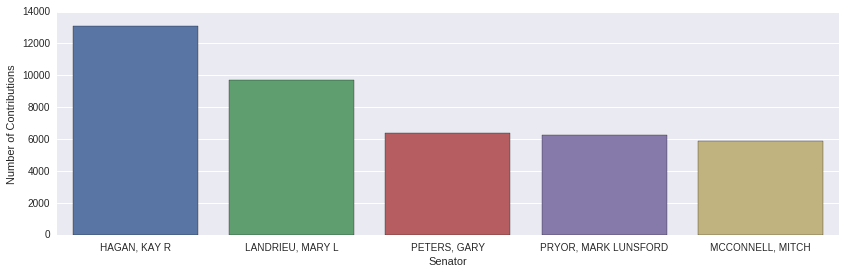

In [8]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_num[:5], amounts_num[:5])
plt.xlabel('Senator')
plt.ylabel('Number of Contributions')
plt.show()

In [ ]:
import datetime
from datetime import date
import random

d = warren_dates[0]
print d.resolution

def dates_in_range(first_date, last_date):
    first = first_date.toordinal()
    last = last_date.toordinal()
    
    dates = []
    for i in range(first, last):
        d = date.fromordinal(i)
        dates.append(d)
        
    return dates

import numpy as np

# Fill in zeros in some data data
def fill_date_data(dates, values):
    sorted_dates = sorted(dates)
    all_dates = dates_in_range(sorted_dates[0], sorted_dates[-1])
    
    zeros = np.zeros((len(all_dates),))
    all_dates_dict = dict(zip(all_dates, zeros))
    
    for (index, value) in enumerate(values):
        date = dates[index]
        all_dates_dict[date] = value
        
    return (all_dates_dict.keys(), all_dates_dict.values())

In [70]:
all_contributions = session.query(Contribution.tx_date, func.count(Contribution.tx_date)).\
                            group_by(Contribution.tx_date).\
                            filter(Contribution.tx_date != None).\
                            filter(Contribution.tx_date >= '2012-1-1').\
                            filter(Contribution.tx_date <= '2016-1-1').\
                            all()
        
dates, counts = zip(*all_contributions)

1165 1165


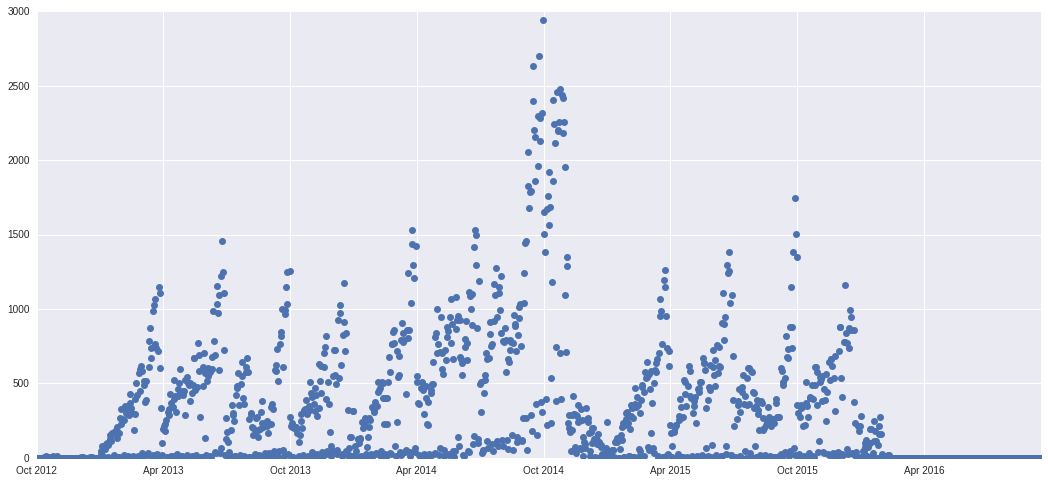

In [71]:
dates, counts = fill_date_data(dates, counts)
plt.figure(figsize=(18, 8))
plt.plot_date(dates, counts, fmt='o')

In [ ]:
def candidate_contributions_by_date(cand_id):
    return session.query(Contribution.tx_date, func.count(Contribution.tx_date)).\
            group_by(Contribution.tx_date).\
            filter(Contribution.tx_date != None).\
            filter(Contribution.tx_date >= '2012-1-1').\
            filter(Contribution.candidate_id == cand_id).\
            all()

In [74]:
warren_id = 'S2MA00170'
warren_contributions =  candidate_contributions_by_date(warren_id)
warren_dates, warren_counts = fill_date_data(*zip(*warren_contributions))
             
markey_id = 'H6MA07101'
markey_contributions = candidate_contributions_by_date(markey_id)
markey_dates, markey_counts = fill_date_data(*zip(*markey_contributions))
   
sullivan_id = 'S4AK00214'
sullivan_contributions = candidate_contributions_by_date(sullivan_id)
sullivan_dates, sullivan_counts = fill_date_data(*zip(*sullivan_contributions))

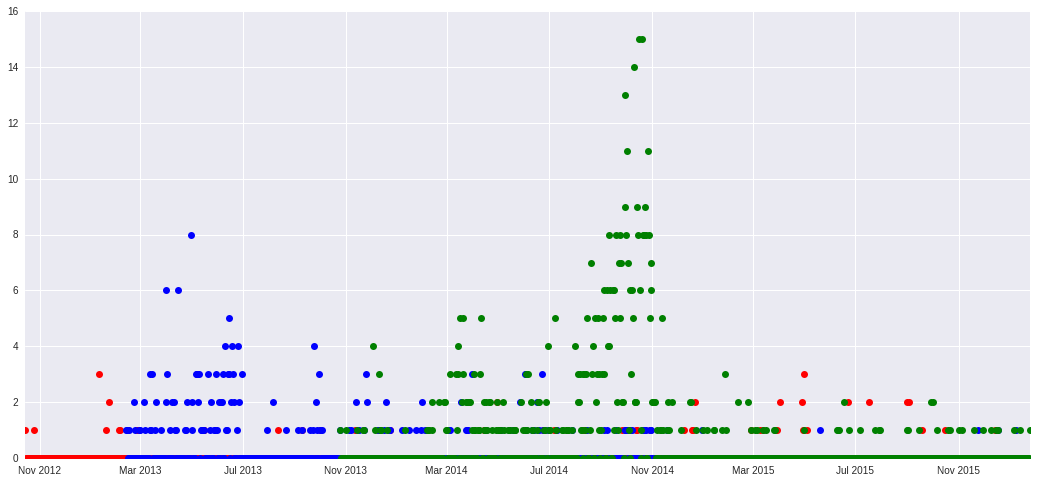

In [75]:
plt.figure(figsize=(18, 8))
plt.plot_date(warren_dates, warren_counts, fmt='ro')
plt.plot_date(markey_dates, markey_counts, fmt='bo')
plt.plot_date(sullivan_dates, sullivan_counts, fmt='go')

In [14]:
def candidate_dollars_by_date(cand_id):
    return session.query(Contribution.tx_date, func.sum(Contribution.tx_date)).\
            group_by(Contribution.tx_date).\
            filter(Contribution.tx_date != None).\
            filter(Contribution.tx_date >= '2012-1-1').\
            filter(Contribution.candidate_id == cand_id).\
            all()

In [15]:
warren_id = 'S2MA00170'
warren_contributions =  candidate_contributions_by_date(warren_id)
warren_dates, warren_dollars = fill_date_data(*zip(*warren_contributions))
             
markey_id = 'H6MA07101'
markey_contributions = candidate_contributions_by_date(markey_id)
markey_dates, markey_dollars = fill_date_data(*zip(*markey_contributions))
   
sullivan_id = 'S4AK00214'
sullivan_contributions = candidate_contributions_by_date(sullivan_id)
sullivan_dates, sullivan_dollars = fill_date_data(*zip(*sullivan_contributions))

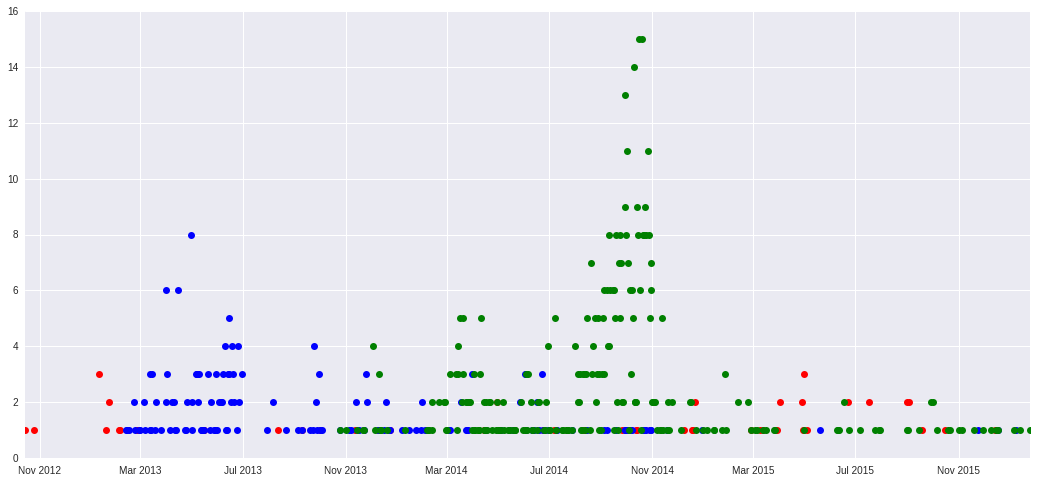

In [17]:
plt.figure(figsize=(18, 8))
plt.plot_date(warren_dates, warren_dollars, fmt='ro')
plt.plot_date(markey_dates, markey_dollars, fmt='bo')
plt.plot_date(sullivan_dates, sullivan_dollars, fmt='go')

In [67]:

    
dates = random.sample(warren_dates, 3)
dates, values = fill_date_data(dates, range(3))

1 day, 0:00:00


In [59]:
dict([1, 2, 3], ['a', 'b', 'c'])

TypeError: dict expected at most 1 arguments, got 2

In [35]:
gammas.timepoint

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
5970    10
5971    10
5972    10
5973    10
5974    10
5975    10
5976    10
5977    10
5978    10
5979    10
5980    10
5981    10
5982    10
5983    10
5984    10
5985    10
5986    10
5987    10
5988    10
5989    10
5990    10
5991    10
5992    10
5993    10
5994    10
5995    10
5996    10
5997    10
5998    10
5999    10
Name: timepoint, dtype: float64